## E02 Notebook - Daniel Agraz Vallejo

In [26]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, save_model, load_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### **E2.1:** Employing Tensorflow conduct the logic operation on each of the displayed examples.

<img src='imgs/E2.1Examples.png' alt='E2.1 Ejemplos'>

In [ ]:
def buffer(A:tf.Tensor) -> tf.Tensor:
    io_description(A, B=None)
    return A

# Logical AND
def land(A:tf.Tensor, B:tf.Tensor) -> tf.Tensor: 
    io_description(A,B)
    return tf.logical_and(A, B)

# Logical OR
def lor(A:tf.Tensor, B:tf.Tensor) -> tf.Tensor:
    io_description(A,B)
    return tf.logical_or(A, B)

# Logical NOT | tf.logical.not()

# Logical Function 
def logic_func(A:tf.Tensor, B:tf.Tensor) -> tf.Tensor:
    io_description(A,B)
    return tf.logical_and(A, tf.logical_not(B))

def io_description(A:tf.Tensor, B:tf.Tensor):
    if B is None: print(f'IN: A-{A}')
    else: print(f'IN: A-{A} | B-{B}')

In [ ]:
A0 = B0 = tf.constant(False, dtype=tf.bool)
A1 = B1 = tf.constant(True, dtype=tf.bool)
tv0 = tf.Variable([(A0,B0),(A0,B1),(A1,B0),(A1,B1)])


A20 = B20 = tf.constant([False,False], dtype=tf.bool)
A21 = B21 = tf.constant([False,True], dtype=tf.bool)
A22 = B22 = tf.constant([True,False], dtype=tf.bool)
A23 = B23 = tf.constant([True,True], dtype=tf.bool)
tvA = tf.Variable([A20,A21,A22,A23])
tvB = tf.Variable([B20,B21,B22,B23])

##### Buffer | C = A 

In [ ]:
print(f'\033[1mBuffer:\033[0m')
print(f'OUT: {buffer(A0)}\n')
print(f'OUT: {buffer(A1)}\n')

##### Logical AND | C = A $\land$ B

In [ ]:
print(f'\033[1mLogical AND:\033[0m')
for bools in tv0:
    print(f'OUT: {land(bools[0],bools[1])}\n')

for boolA in tvA:
    for boolB in tvB:
        print(f'OUT: {lor(boolA, boolB)}\n')

##### Logical OR C = A $\lor$ B

In [ ]:
print(f'\033[1mLogical OR:\033[0m')
for bools in tv0:
    print(f'OUT: {lor(bools[0],bools[1])}\n')

for boolA in tvA:
    for boolB in tvB:
        print(f'OUT: {lor(boolA, boolB)}\n')

##### Logical Function #1 | C = A $\lor\;\neg$ B

In [ ]:
print(f'\033[1mLogical Function:\033[0m')
for bools in tv0:
    print(f'OUT: {logic_func(bools[0],bools[1])}\n')

for boolA in tvA:
    for boolB in tvB:
        print(f'OUT: {logic_func(boolA, boolB)}\n')

#### **E2.2:** Implement scikit-learn's perceptron to classify flowers from the Iris Dataset



In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.insert(4, 'class label', iris.target.reshape(-1,1))
df_iris = df_iris[['petal length (cm)', 'petal width (cm)', 'class label']]
df_iris


In [ ]:
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)
model = Perceptron(tol=1e-3, random_state=1)
model.fit(X, y)
print("%0.3f" % model.score(X,y))

In [ ]:
# 1 | Iris-Setosa
# 0 | Not Iris-Setosa
X_test = np.array([[2.0, 0.5],
                   [3.6, 1.1],
                   [4.9, 1.9]])
model.predict(X_test)

In [ ]:
# Scratch Implementation
# X = iris.data[:, (2,3)]
# y = iris.target.reshape(-1,1)
# w = np.random.uniform(low=0.001, high=1.0, size=(150, 1))
# b = np.random.randint(1,5, size=(1))

# z = X * w + b

# for i in range(1000):
#     pass


#### **E2.3 :** Implement the XOR Operator with a Multi-Layer Perceptron (MLP)

In [ ]:
def step(z:np.int32) -> np.int32:
    return 0 if z < 0 else 1

def input_x() -> tuple:
    # Input binary values
    while True:
        try:
            input_x1 = int(input("Enter x1 bits: "), 2)
            input_x2 = int(input("Enter x2 bits: "), 2)
            break
        except ValueError:
            print("Invalid bit. Input only binary values")
    return input_x1, input_x2

def init_params() -> tuple:
    w1 = tf.cast(tf.constant([1, 1]), tf.float32)
    w2 = tf.cast(tf.constant([-1, 1]), tf.float32)
    b1 = tf.constant([-1.5, -0.5])
    b2 = tf.constant([-0.5])
    return w1, w2, b1, b2

def forward_prop(w, x, b) -> tf.float32:
    return tf.reduce_sum(tf.multiply(w,x)) + b


In [ ]:
x1, x2 = input_x()
w1, w2, b1, b2 = init_params()
z11 = forward_prop(w1, tf.cast(tf.constant([x1, x2]), tf.float32), b1[0])
z12 = forward_prop(w1, tf.cast(tf.constant([x1, x2]), tf.float32), b1[1])
# print(f'Z1: {z11} | Z2: {z12}')

# Activation 1st Layer
a11, a21 = step(z11), step(z12)
# print(f'A11: {a11}, A21: {a21}')

# Activation 2nd Layer
z21 = forward_prop(w2, tf.constant([a11, a21], dtype=tf.float32), b2)
# print(f'Z21: {z21}')

y = step(z21) 

print(f'x1: {x1}')
print(f'x2: {x2}')
print(f'y: {y}')

#### **E2.4:** Implement MLP Classifier
Implementar un perceptrón multicapa empleando el MLPClassifier de scikit-learn  
(sklearn.neural_network.MLPClassifier) como clasificador para el problema XOR.   
Emplear una arquitectura con 2 capas ocultas, 4 neuronas en la primer capa y  
2 neuronas en la segunda capa.

In [ ]:
# Input Dataset
X = tf.constant([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])

y = tf.constant([0,1,1,0])

# Model
model = MLPClassifier(
    hidden_layer_sizes= [4, 2],
    random_state=1,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=800,
    verbose=False)

# Training
model.fit(X, y)
print("%0.3f" % model.score(X,y))

# Predict
X_test = np.array([[0,1],
                   [1,0],
                   [0,0]])

model.predict(X_test)

#### **E2.5:** Implement MLP Regressor
Implementar un perceptrón multicapa empleando el MLPRegressor de scikit  
learn (sklearn.neural_network.MLPRegressor) para la estimación del valor  
medio de vivienda con el conjunto de datos California Housing de scikit learn.  
Emplear una arquitectura con 3 capas ocultas, cada una con 50 neuronas y  
evaluar el RMSE con datos de prueba.

In [ ]:
# Input Dataset
housing = datasets.fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Model
model = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=800,
    verbose=False)
pipeline = make_pipeline(StandardScaler(), model)

# Training
pipeline.fit(X_train, y_train)

In [ ]:
# Predict
y_pred_valid = pipeline.predict(X_valid)
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f'Validation RMSE: {rmse_valid}')

y_pred_test = pipeline.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'Test RMSE: {rmse_test}')

#### **E2.6:** Implement Softmax

In [ ]:
import numpy as np
output = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z))
    return A

probs = softmax(np.array(output))
max_prob = np.argmax(probs)

print(f'Output Probabilities: {probs}')
print(f'Class Output: {max_prob}')

#### **E2.7:** Verify your Keras installed version

In [ ]:
print(keras.__version__)

## Phases to build an Image Classifier 


#### **1) Load Dataset**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
y_train_full = y_train_full.reshape(-1,1); y_test = y_test.reshape(-1,1) 

In [ ]:
print(f"""
X_train_full: {X_train_full.shape}
X_test: {X_test.shape}
y_train_full: {y_train_full.shape}
y_test: {y_test.shape} 
""")

In [ ]:
X_train_full[0,:,:].shape

In [ ]:
X_train_full.dtype

In [ ]:
# Divide pixels by 255, to normalize values between 0 and 1
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000].reshape((-1,1)), y_train_full[5000:].reshape((-1,1))
X_test = X_test / 255
print(f"""
X_valid: {X_valid.shape}
X_train: {X_train.shape}
y_valid: {y_valid.shape}
y_train: {y_train.shape} 
""")

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

In [ ]:
class_names = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress", 
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle Boot"
}

In [ ]:
y_train = y_train.flatten()
class_names[y_train[0]]

In [ ]:
X_valid.shape

In [ ]:
X_test.shape

#### **2) Model Creation**

Esta arquitectura consiste en un perceptrón multicapa (MLP) para clasificación con dos capas ocultas:

In [ ]:
# Set seed for result reproductibility
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

En lugar de agregar las capas una por una como lo acabamos   
de hacer se puede pasar una **lista de capas** al crear el  
modelo secuencial:

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),   # Transforms a 2D vector a 1D feature array
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Se puede obtener la lista de capas del modelo, identificadas por nombre o índice:

In [ ]:
model.layers

El método `summary()` del modelo muestra todas las capas del modelo, incluido el nombre de cada capa, su forma de salida y su número de parámetros.

In [ ]:
model.summary()

- Se debe tener en cuenta que las capas densas (Dense) suelen tener muchos parámetros.  

- Por ejemplo, la primera capa oculta tiene $74 \times 300$ pesos de conexión, más $300$ términos de sesgo, lo que suma $235,500$ parámetros.  

- Esto le da al modelo mucha flexibilidad para adaptarse a los datos de entrenamiento, pero también significa que el modelo corre el riesgo de sobreajuste, especialmente cuando no tiene muchos datos de entrenamiento

- Google te pone el almacenamiento que ocupan los pesos

In [ ]:
print(type(model))

Normalmente, los pesos se inicializan de forma aleatoria.

**¿Qué pasa si inicializas los pesos en 0?**  
La red se vuelve simétrica y todas las neuronas se ven como si fueran una sola

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer(hidden1.name) is hidden1

In [ ]:
# get_weights() returns the layer's weights
weights, biases = hidden1.get_weights()
weights

In [ ]:
weights.shape

Se puede observar que la capa densa (Dense) incializó la matriz de pesos de conexión $\;\left(784 \times300 \right)$

#### **3) Compile Model**

Después de crear el modelo, debemos llamar al método compile() para especificar la función de pérdida y el optimizador que se utilizará. Opcionalmente, se puede especificar una lista de métricas adicionales para ser calculadas durante el entrenamiento y la evaluación:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- La **precisión (accuracy)** de un modelo generalmente se determiina después de que los parámetros del modelo se aprenden, se fijan y ya no se lleva a cabo el aprendizaje.  

- Luego, las muestras de prueba se envían al modelo y se registra el número de errores que comete el modelo, después de la comparación con los objetivos verdaderos. Entonces se calcula el porcentaje de clasificación errónea.

- Por ejemplo, si el número de muestras de prueba es $10,000$ y el modelo clasifica $9,816$ de ellas correctamente, entonces la precisión del modelo $98.16%$

- Cuanto menor sea la pérdida (loss), mejor será un modelo (a menos que el modelo se haya ajustado demasiado a los datos de entrenamiento)

Después de crear el modelo, debemos llamar al método `compile()` para especificar la función de pérdida y el optimizador que se utilizará. Opcionalmente, se puede especificar una lista de métricas adicioanles para ser calcualdas durante el netreamiento y la evaluación.

¿Cuando utilizar el ID, cuando el nombre completo?
Cuando se utiliza el optimizador SGD, es importante ajustar la tasa de aprendizaje.
SGD = 0.01 (Default).

- Así que generalmente se emplea `optimizer=tf.keras.optimizers.SGD(learning_rate=__???__)` para establecer la tasa de aprendizaje, en lugar de `optimizer='sgd'`, que por defecto tiene una tasa de aprendizaje de 0.01

#### **4) Training and Model Assessment**
Ahora el modelo está listo para ser entrenado. Para eso simplemente necesitamos llamar a su método fit()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience = 2)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks = [early_stop])

Ahora, la red neuronal está entrenada. 

El tamaño estandar de los lotes es 32, por los bits de la computadora.
Keras es potente y muy rápido, pero sino sabemos que estamos haciendo puede ser una caja negra.

- El Descenso de Gradiente por Mini Lotes: Es una variación del algoritmo

Por cada batch, reajusto pesos.
Repito 30 por epochs (épocas)
Cada época trabaja con 32 imágenes (1 batch)

- El método `fit()` devuelve un objeto **history** que contiene los parámetros de entrenamiento 

In [ ]:
history.params

In [ ]:
print(history.epoch)

In [ ]:
history.history.keys()

#### **E2.8: Plot Learning Curves** 
- Emplear el diccionario (`history.history`) que contiene la pérdida y la precisión que se calcularon al final de cada época en el conjunto de entrenamiento y en el conjunto de validación para obtener las curvas de aprendizaje.  

- Utilizar un *data frame* de Pandas a través del método `DataFrame().plot()` para graficar las curvas de aprendizaje.  

In [ ]:
learning_curves = pd.DataFrame(history.history)
learning_curves

In [ ]:
learning_curves.plot()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

In [ ]:
np.array(list(class_names.values()))[y_pred]

#### **E2.9:** Visualize predictions
- Los resultados anteriores muestran que el clasificador basado en una red neuroanl profunda clasificó las tres imágenes correctamente.  
  
- Utilizar Matploblib para imprimir las imágenes con el objetivo de visualizar de forma gráfico los resultados, cada imágen deberá desplegar su clase (etiqueta) correspondiente, la predicción y su probabilidad.

In [ ]:
fig = plt.figure(figsize=(10,10))
rows = 1; cols = 3

for i in range(len(y_pred)):
    fig.add_subplot(rows, cols, i+1)
    print(f"Probability: {np.max(y_proba.round(2)[i,:])}")
    print(f"Predicted: {class_names[y_pred[i]]}")
    print(f"Real Value: {class_names[y_test[i][0]]}")
    plt.imshow(X_test[i], cmap="viridis")
    plt.show()
    

#### **E2.10:** Normalize Dataset for Regression
1. Cargar el conjunto de datos California Housing empleando `fetch_california_housing()` de ScikitLearn, el cual contiene 20,640 muestras con 8 características.

2. Dividir el conjunto de datos, en un conjunto de entrenamiento (75%) y un conjunto de prueba (25%) empleando `train_test_split()`.

3. Dividir el conjunto de entrenamiento, en un conjunto de entrenamiento (75%) y un conjunto de validación (25%).

4. Escalar todas las características utilizando `StandardScaler()` para estandarizar el conjunto de datos(distribución estándar).

In [30]:
housing = datasets.fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, train_size=0.75, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, train_size=0.75, test_size=0.25, random_state=42)

In [20]:
print(X_train_full.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [21]:
print(X_train.shape)
print(X_valid.shape)

(11610, 8)
(3870, 8)


In [31]:
y_train = np.reshape(y_train, newshape=(-1,1))
y_train.shape

(11610, 1)

In [32]:
scaler = StandardScaler(); 
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train.shape[1:]

(8,)

#### **E2.11: Regression Model for California Housing**
1. Utilizar el modelo secuencial `tf.keras.models.Sequential()` para implementtar la red neuronal profunda para regresión en el conjunto de datos California Housing.

2. Implemenmtar las fases de construcción del modelo, compilación, entrenamiento y evaluación.
  
3. Graficar las curvas de la funciónde pérdida (mean_squared_error), considerando la información de la pérdida que se calculó al fial de cada época en el conunto de entrenamiento y en el conjunto de validación.
  
4. Realizar la evaluación de su modelo empleando el método evaluate()  

5. Utilizar el método predict() del modelo para hacer predicciones en nuevas instancias.

In [33]:
df_features = pd.DataFrame(housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(housing.target, columns=housing.target_names)
df_features.insert(0, 'Intercept', 1)

df_features

,Intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,1,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,1,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
tf.keras.backend.clear_session()

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='mean_squared_error', 
              optimizer='adam')

In [23]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 2.0681 - val_loss: 29.5290
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8537 - val_loss: 28.1899
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8641 - val_loss: 23.2479
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7108 - val_loss: 38.2180
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7937 - val_loss: 36.4835
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8632 - val_loss: 20.6384
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7918 - val_loss: 13.6448
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7051 - val_loss: 22.1192
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7585 - val_loss: 8.3318
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6508 - val_loss

In [24]:
learning_curves = pd.DataFrame(history.history)
learning_curves

,loss,val_loss
0,2.068096,29.529005
1,0.853662,28.189859
2,0.864117,23.247894
3,0.710817,38.218029
4,0.793692,36.483463
5,0.863225,20.638391
6,0.791812,13.644838
7,0.705058,22.119240
8,0.758499,8.331774
9,0.650849,10.781373


<Axes: >

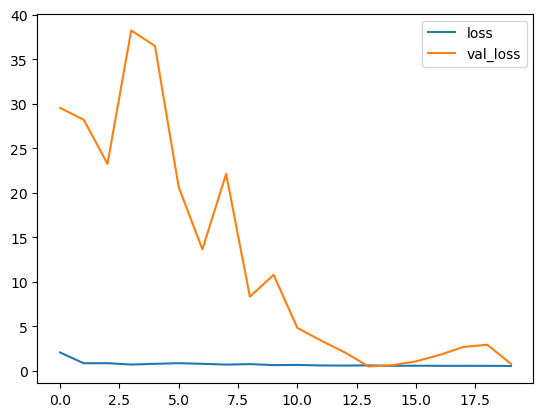

In [25]:
learning_curves.plot()

In [ ]:
X_test_scaled = scaler.transform(X_test)
model.evaluate(X_test_scaled, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#### **E2.12: Save model to H5 extension**  
- Keras utiliza el formato HDF5 para guardar tanto la arquitectura del modelo (incluidos los hiperparámetros de cada capa) como los valores de todos los parámetros del modelo para cada capa (por ejemplo, pesos de conexión y sesgos). También guarda el optimizador (incluidos sus hiperparámetros y cualquier estado que pueda tener)  
  
- Por lo general, se tendrá un script que entrena un modelo y lo guarda, y uno o más scripts (o servicios web) que cargan el modelo y l outilizan para hacer predicciones.

1. Para la red neuronal profunda para regresión que se realizó para en el conjunto de datos California Housing, guardar el modelo empleando `model.save("my_keras_mode.h5")`.  

2. Cargar el modelo que se guardo mediante
	`keras.models.load_model("my_keras_model.h5")` y realizar algunas predicciones

In [27]:
save_model(model, "ModelCA.h5")

/var/folders/fd/8p6y3p9d67l9ms3hzwcf97vm0000gn/T/ipykernel_56770/412872426.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "ModelCA.h5")


#### **Ejercicio 2.13:** Adjust Hyperparameters
- Mejorar la implementación realizada en el Ejercicio 2.10 mediante el ajuste de los HYP para obtener un mejor valor en la función pde pérdida que esta dado por el MSE.  
  
- Cambiar la cantidad de capas ocultas, la cantidad den uronas por capa, el itpo de funcion de activación a utilizar en cada capa.

In [67]:
tf.keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='LeakyReLU', input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation='LeakyReLU', input_shape=X_train.shape[1:]),
    keras.layers.Dense(150, activation='tanh', input_shape=X_train.shape[1:]),
    keras.layers.Dense(200, activation='tanh', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(lr=0.001))

In [68]:
history = model.fit(X_train_scaled, y_train, epochs=70,
                    validation_data=(X_valid_scaled, y_valid),
                    batch_size=64)

Epoch 1/70
  7/182 [>.............................] - ETA: 1s - loss: 2.9039  

2024-03-13 17:31:13.361143: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


182/182 [==============================] - 2s 9ms/step - loss: 0.6018 - val_loss: 0.3650
Epoch 2/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3836 - val_loss: 0.3643
Epoch 3/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3650 - val_loss: 0.3279
Epoch 4/70
182/182 [==============================] - 2s 8ms/step - loss: 0.3558 - val_loss: 0.3636
Epoch 5/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3425 - val_loss: 0.3194
Epoch 6/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3314 - val_loss: 0.3117
Epoch 7/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3334 - val_loss: 0.3100
Epoch 8/70
182/182 [==============================] - 2s 9ms/step - loss: 0.3279 - val_loss: 0.3139
Epoch 9/70
182/182 [==============================] - 1s 8ms/step - loss: 0.3242 - val_loss: 0.2976
Epoch 10/70
182/182 [==============================] - 1s 7ms/step - loss: 0.3204 - val_loss: 0.3005
Epoch 11/7

<Axes: >

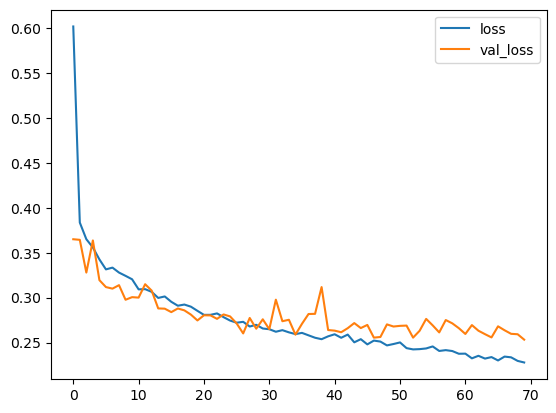

In [69]:
learning_curves = pd.DataFrame(history.history)
learning_curves.plot()

In [70]:
X_test_scaled = scaler.transform(X_test)
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2582


0.2582196593284607

In [71]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 56ms/step


array([[3.67],
       [3.74],
       [3.78]], dtype=float32)

In [72]:
save_model(model, "ModelCAV5.h5")

/var/folders/fd/8p6y3p9d67l9ms3hzwcf97vm0000gn/T/ipykernel_56770/4241093735.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "ModelCAV5.h5")


In [ ]:
load_model()